# HOTEL RESERVATION PTOJECT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,precision_score,recall_score
from sklearn.svm import SVC

### Loading Dataset

In [2]:
df = pd.read_csv("Aditya.csv")

####
#### The dataset of "Hotel Reservation" contains 'Booking status' as target column we aim to analyzed how other features 

#### influence it.
####

In [3]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
df.drop("Booking_ID",axis=1,inplace=True)

In [5]:
df.drop("lead_time",axis=1,inplace=True)

#### Booking Id and lead time column Removed Because it does not show any relation with other features and it does not give any important Information

#### Cheking null values

In [6]:
df.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   arrival_year                          36275 non-null  int64  
 8   arrival_month                         36275 non-null  int64  
 9   arrival_date                          36275 non-null  int64  
 10  market_segment_type                   36275 non-null  object 
 11  repeated_guest 

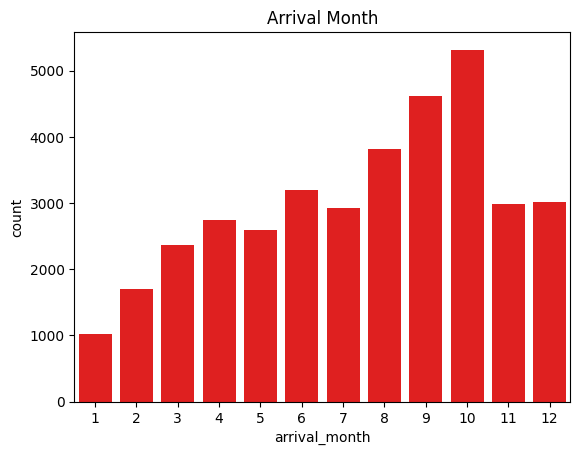

In [8]:
plt.title("Arrival Month")
sns.countplot(df,x="arrival_month",color = "red")
plt.show()

#### arrival month graph indicates the highest booking in month 10, the conclusion could be that
#### Octoter experiences the peak season for hotel reservations, suggesting potential opportunities
#### for revenue maximization and resource allocation during this period.

Text(0, 0.5, 'Counting values')

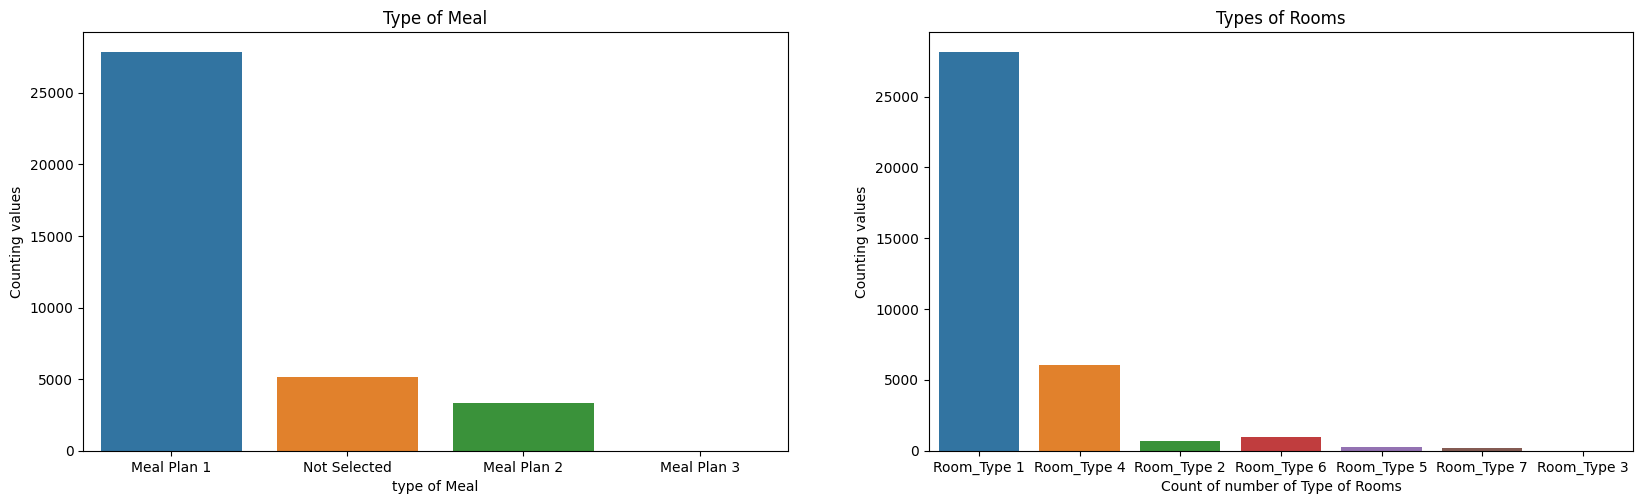

In [9]:
plt.figure(figsize= (20,25))
plt.subplot(4,2,3)
plt.title("Type of Meal")
sns.countplot(x=df["type_of_meal_plan"], palette="tab10", data=df)
plt.xlabel("type of Meal")
plt.ylabel("Counting values")

plt.subplot(4,2,4)
plt.title("Types of Rooms")
sns.countplot (x=df["room_type_reserved"], palette="tab10", data=df)
plt.xlabel("Count of number of Type of Rooms")
plt.ylabel("Counting values")

#### in this graphs we can observe that type of meal plan - 1 is prefered more tham others

#### in second plot we can observe that type - 1 room is mostly prefered by the customers

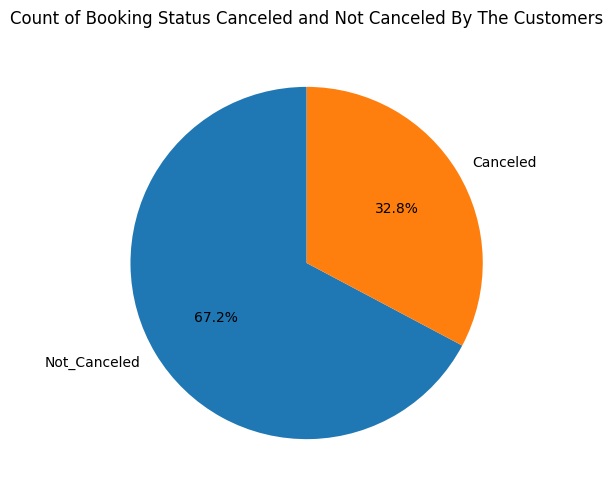

In [10]:
room_type_counts = df['booking_status'].value_counts()
# Plot
plt.figure(figsize=(5, 6))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Count of Booking Status Canceled and Not Canceled By The Customers')
plt.axis('equal')
plt.show()

### Insights : Customers Who Canceled Booking Has Less Percentage Compare to Not Canceled

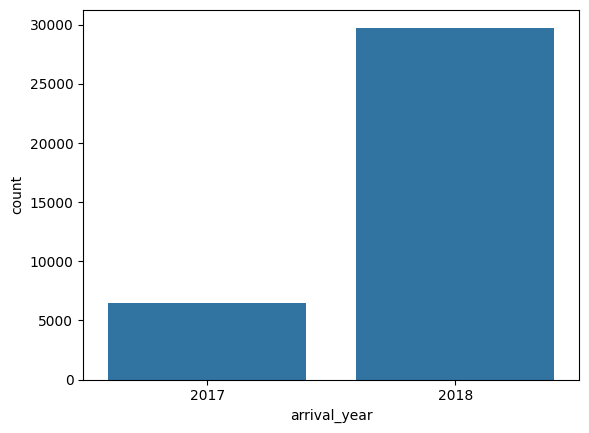

In [11]:
sns.countplot(x=df["arrival_year"])
plt.show()

#### Insights :  Here we Observed that maximum customers arrives in in the year of 2018

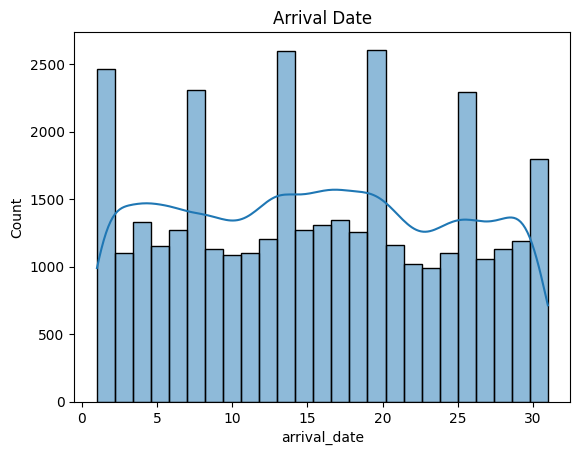

In [12]:
plt.title("Arrival Date")
sns.histplot(df["arrival_date"],bins=25,kde=True)
plt.show()

### Insights : Maximum Customers Arrives in Hotel in the Middle of Month Between  Dates of 10 to 20

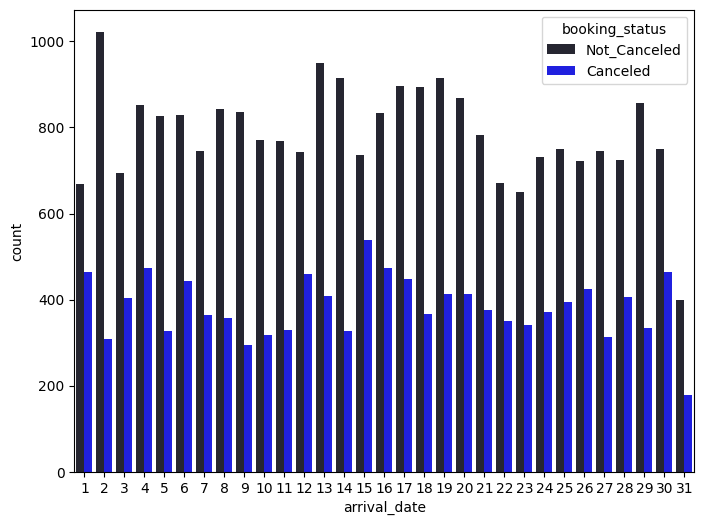

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(x=df["arrival_date"],hue=df["booking_status"],color="b")
plt.show()

#### we observed that on the second of the month there is the highest number of non_coancelled hotel reservation,
#### where as on the 15th of the month there is the highest number of cancelled hotel reservation. 

### Correlation analysis a valuable tool in exploratory data analysis predictive modeling providing insights into the relationships 
### between variables and guiding decision_making processes in various domaains so we use correlation on different feature of our data

In [14]:
df.groupby("booking_status")['no_of_adults'].mean()

booking_status
Canceled        1.909550
Not_Canceled    1.813489
Name: no_of_adults, dtype: float64

In [15]:
df[["no_of_children","avg_price_per_room"]].corr(method="pearson")

,no_of_children,avg_price_per_room
no_of_children,1.000000,0.337728
avg_price_per_room,0.337728,1.000000


####
#### The correlation coefficient between the 'Number of children' and the 'Average price per room' is approximately
#### 0.337728, indicating a moderate positive linear relationship between these two variables.
####

In [39]:
df[["no_of_children","booking_status"]].corr(method="pearson")

,no_of_children,booking_status
no_of_children,1.000000,-0.033078
booking_status,-0.033078,1.000000


###
#### The correlation coefficient between the 'Number of children' and 'Booking status' is approximately -0.033078,
#### suggesting a weak negative linear relationship between the two variables.
###

In [ ]:
df[["no_of_adults","avg_price_per_room"]].corr(method="pearson")

###
#### The correlation coefficient between the 'Number of adults' and the 'Average price per room' is approximately
#### 0.296886, suggesting a moderate positive linear relationship between these two variables.
####

In [ ]:
df["repeated_guest"].unique()

In [ ]:
df["room_type_reserved"].unique()

#### applying appropriate mappings to the data,can extract valuable insights and make informed decisions.
#### so, we are converting two columns (room type reserved, type of meal plan) into numeric form

In [17]:
Room = {"Room_Type 1" : 1,
        "Room_Type 2" : 2,
        "Room_Type 3" : 3,
        "Room_Type 4" : 4,
        "Room_Type 5" : 5,
        "Room_Type 6" : 6,
        "Room_Type 7" : 7}

In [18]:
Meal = {"Meal Plan 1" : 1,
        "Meal Plan 2" : 2,
        "Meal Plan 3" : 3,
        "Not Selected": 0}

In [19]:
df["booking_status"].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [20]:
status = {"Canceled" :  0,
        "Not_Canceled" : 1}

In [21]:
status

{'Canceled': 0, 'Not_Canceled': 1}

In [22]:
df["booking_status"] = df["booking_status"].map(status)

In [23]:
Meal

{'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Meal Plan 3': 3, 'Not Selected': 0}

In [24]:
df["type_of_meal_plan"] = df["type_of_meal_plan"].map(Meal)

In [25]:
df["type_of_meal_plan"].unique()

array([1, 0, 2, 3], dtype=int64)

In [26]:
Room

{'Room_Type 1': 1,
 'Room_Type 2': 2,
 'Room_Type 3': 3,
 'Room_Type 4': 4,
 'Room_Type 5': 5,
 'Room_Type 6': 6,
 'Room_Type 7': 7}

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   arrival_year                          36275 non-null  int64  
 8   arrival_month                         36275 non-null  int64  
 9   arrival_date                          36275 non-null  int64  
 10  market_segment_type                   36275 non-null  object 
 11  repeated_guest 

In [28]:
df['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [29]:
df["room_type_reserved"] = df['room_type_reserved'].map(Room)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  int64  
 7   arrival_year                          36275 non-null  int64  
 8   arrival_month                         36275 non-null  int64  
 9   arrival_date                          36275 non-null  int64  
 10  market_segment_type                   36275 non-null  object 
 11  repeated_guest 

In [31]:
df["market_segment_type"].value_counts()

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le = LabelEncoder()

In [34]:
df["market_segment_type"] = le.fit_transform(df["market_segment_type"])

In [35]:
df["avg_price_per_room"] = df["avg_price_per_room"].astype(int)

In [36]:
data = df

In [37]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,1,0,1,2017,10,2,3,0,0,0,65,0,1
1,2,0,2,3,0,0,1,2018,11,6,4,0,0,0,106,1,1
2,1,0,2,1,1,0,1,2018,2,28,4,0,0,0,60,0,0
3,2,0,0,2,1,0,1,2018,5,20,4,0,0,0,100,0,0
4,2,0,1,1,0,0,1,2018,4,11,4,0,0,0,94,0,0


In [38]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.949966,0.030986,1.708890,2017.820427,7.423653,15.596995,3.552447,0.025637,0.023349,0.153411,103.157298,0.619655,0.672364
std,0.518715,0.402648,0.870644,1.410905,0.480191,0.173281,1.399851,0.383836,3.069894,8.740447,0.681536,0.158053,0.368331,1.754171,35.066193,0.786236,0.469358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2018.000000,5.000000,8.000000,3.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,2018.000000,8.000000,16.000000,4.000000,0.000000,0.000000,0.000000,99.000000,0.000000,1.000000
75%,2.000000,0.000000,2.000000,3.000000,1.000000,0.000000,1.000000,2018.000000,10.000000,23.000000,4.000000,0.000000,0.000000,0.000000,120.000000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,3.000000,1.000000,7.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


#### the terms "x" and "y" typically represent the input features (independent variables) and
#### the target variable (dependent variable)input features (x) represent the information used by the model
#### for prediction, while the target variable (y) represents the quantity we are trying to predict

In [40]:
x = df.drop("booking_status",axis=1)
y = df["booking_status"]

In [41]:
x.shape

(36275, 16)

In [42]:
y.shape

(36275,)

#### Split data Into Train and Test allows for the Model training of the porttion of the data and evaluation on another

In [43]:
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.3,random_state=25)

In [44]:
x_tr.shape

(25392, 16)

In [45]:
x_te.shape

(10883, 16)

####  Applying K - Nearest Neighbours Classifier

In [46]:
KNN = KNeighborsClassifier(n_neighbors=3)

In [47]:
KNN.fit(x_tr,y_tr)

KNeighborsClassifier(n_neighbors=3)

In [48]:
Tr = KNN.score(x_tr,y_tr)

In [49]:
y_p = KNN.predict(x_te)

In [50]:
Te = accuracy_score(y_te,y_p)

In [51]:
f1_knc = f1_score(y_te,y_p)

In [52]:
rec_knc = recall_score(y_te,y_p)

In [53]:
pre_knc = precision_score(y_te,y_p)

#### An Accuracy of 0.7808508683267481 for K Nearest Neighbours (KNN) 
#### Indicates That Appriximately 78.08% of Prediction Made By The Model Are Correct

In [54]:
conf = confusion_matrix(y_te,y_p)

In [55]:
conf

array([[2325, 1307],
       [1078, 6173]], dtype=int64)

#### In confusion matrix visualizes the model's performance by showing the count of true positives,
#### true negatives, false positives, and false negativesive
###


In [56]:
print(classification_report(y_te, y_p))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66      3632
           1       0.83      0.85      0.84      7251

    accuracy                           0.78     10883
   macro avg       0.75      0.75      0.75     10883
weighted avg       0.78      0.78      0.78     10883



#### Applying Support Vector Machine

In [57]:
svc = SVC(kernel="linear")

In [58]:
svc.fit(x_tr,y_tr)

SVC(kernel='linear')

In [59]:
y_pre = svc.predict(x_te)

In [60]:
Test = accuracy_score(y_te,y_pre)

In [61]:
Train = svc.score(x_tr,y_tr)

In [62]:
print(f"Traing Score if SVC  = {Train}")
print(f"Testing Score of SVC = {Test}")

Traing Score if SVC  = 0.7498030875866415
Testing Score of SVC = 0.7390425434163375


### An Acccuracy of 73.90% indicated responisible Performance for your SVC Model
### on data Indicating that it correctily predicts the outcome(Booking Status) 
### for abour 73.90% of the sample in the dataset. 

In [63]:
print(classification_report(y_te,y_pre))

              precision    recall  f1-score   support

           0       0.67      0.42      0.52      3632
           1       0.76      0.90      0.82      7251

    accuracy                           0.74     10883
   macro avg       0.72      0.66      0.67     10883
weighted avg       0.73      0.74      0.72     10883



In [64]:
f1_svc = f1_score(y_te,y_pre)

In [65]:
rec_svc = recall_score(y_te,y_pre)

In [66]:
pre_svc = precision_score(y_te,y_pre)

In [67]:
base_est = DecisionTreeClassifier()

### Applying Stacking Technique

In [68]:
base_estimators = [("svc",SVC(kernel="linear")),
                  ("dt",DecisionTreeClassifier(criterion="entropy",max_depth=5)),
                  ("lireg",LinearRegression())]

In [69]:
model = RandomForestClassifier(n_estimators=100,n_jobs=-1,criterion="entropy")

In [70]:
sc = StackingClassifier(estimators=base_estimators,final_estimator=model,cv=5,n_jobs=-1,verbose=1)

In [71]:
sc.fit(x_tr,y_tr)

StackingClassifier(cv=5,
                   estimators=[('svc', SVC(kernel='linear')),
                               ('dt',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=5)),
                               ('lireg', LinearRegression())],
                   final_estimator=RandomForestClassifier(criterion='entropy',
                                                          n_jobs=-1),
                   n_jobs=-1, verbose=1)

In [72]:
Train_score = sc.score(x_tr,y_tr)

In [73]:
y_pred2 = sc.predict(x_te)

In [74]:
Accuracy_score = accuracy_score(y_te,y_pred2)

In [75]:
f1_sta = f1_score(y_te,y_pred2)
rec_sta = recall_score(y_te,y_pred2)
pre_sta = precision_score(y_te,y_pred2)

In [76]:
print(classification_report(y_te,y_pred2))

              precision    recall  f1-score   support

           0       0.69      0.56      0.62      3632
           1       0.80      0.88      0.83      7251

    accuracy                           0.77     10883
   macro avg       0.74      0.72      0.73     10883
weighted avg       0.76      0.77      0.76     10883



#### Applied stacking Technique combines that Support Vector Classifier, Decision Tree Classifier, and Linear Regression as base estimators  Their predictions are aggregated and fed into a Random Forest Classifier for final estimation which Gives the Accuracy of Model Prediction is Approximately. 77.08 %

In [77]:
print(f"Training Score of KNN = {Tr}")
print(f"Testing Score of KNN = {Te}")
print(f"Training Score of SVM = {Train}")
print(f"Testing Score of SVM = {Test}")
print(f"Training Score of Stacking Technique = {Train_score}")
print(f"Testing Score of Stacking Technique = {Accuracy_score}")

Training Score of KNN = 0.8890595463137996
Testing Score of KNN = 0.7808508683267481
Training Score of SVM = 0.7498030875866415
Testing Score of SVM = 0.7390425434163375
Training Score of Stacking Technique = 0.794462822936358
Testing Score of Stacking Technique = 0.769365064779932


In [78]:
r1_data = [["KNeighbors Classifier", Te, f1_knc,pre_knc,rec_knc]]
r1_columns = ["Model","Accuracy Score","F1 Score","Precision","Recall"]
r1 = pd.DataFrame (r1_data, columns=r1_columns)

In [79]:
r2_data = [["Support Vector Classifier", Test, f1_svc,pre_svc,rec_svc]]
r2_columns = ["Model","Accuracy Score","F1 Score","Precision","Recall"]
r2 = pd.DataFrame (r2_data, columns=r2_columns)

In [80]:
r3_data = [["Stacking Technique", Accuracy_score, f1_sta,pre_sta,rec_sta]]
r3_columns = ["Model","Accuracy Score","F1 Score","Precision","Recall"]
r3 = pd.DataFrame (r3_data, columns=r3_columns)

In [81]:
result = pd.concat([r1,r2,r3])
result_sorted = result.sort_values(by="Accuracy Score",ascending=False)
result_sorted.reset_index(drop = True ,inplace=True)
result_sorted

,Model,Accuracy Score,F1 Score,Precision,Recall
0,KNeighbors Classifier,0.780851,0.838097,0.825267,0.851331
1,Stacking Technique,0.769365,0.834955,0.797914,0.875603
2,Support Vector Classifier,0.739043,0.820933,0.756185,0.897807


####
# RESULT
### Among the models utilized KNN,SVC, and stacking where K-Nearest Neighbours (KNN) exhibits superior performance with an accuracy of 
### 78.08%  In comparison, stacking achieves an accuracy of 77.90 %, while Support Vector Classsifier (SVC) lags behind with 73.90 %. 
### This suggests that the KNN model is most effective for the dataset in terms of predictive accuracy.
